In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv("data/US_Accidents_March23.csv")
data.head(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [16]:
data["End_Time"]

0          2016-02-08 11:00:00
1          2016-02-08 06:37:59
2          2016-02-08 07:19:27
3          2016-02-08 07:53:34
4          2016-02-08 08:09:07
                  ...         
7728389    2019-08-23 18:32:01
7728390    2019-08-23 19:38:23
7728391    2019-08-23 19:28:49
7728392    2019-08-23 19:29:42
7728393    2019-08-23 19:21:31
Name: End_Time, Length: 7728394, dtype: object

In [18]:
data["End_Time"] = pd.to_datetime(data["End_Time"], errors="coerce", format="%Y-%m-%d %H:%M:%S.%f")
data["End_Hour"] = data["End_Time"].dt.hour

In [28]:
end_hour = data['End_Hour']
end_hour

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
7728389   NaN
7728390   NaN
7728391   NaN
7728392   NaN
7728393   NaN
Name: End_Hour, Length: 7728394, dtype: float64

In [24]:
severity = data['Severity']

<Axes: xlabel='Severity', ylabel='End_Hour'>

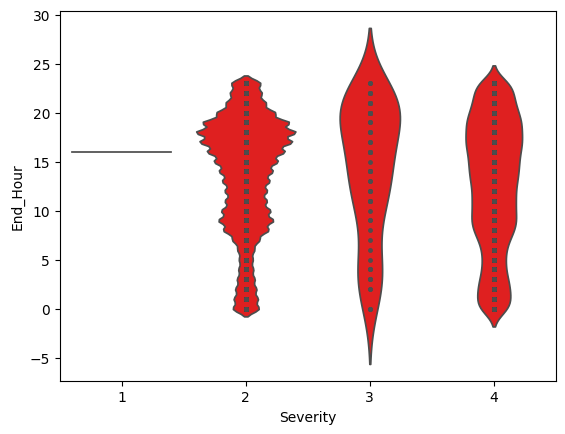

In [ ]:
# Violin plot of Severity vs End Hour
sns.violinplot(data=data, x=severity, y=end_hour, inner='point', color='red')

In [ ]:
data.columns

In [ ]:
data["Start_Time"] = pd.to_datetime(data["Start_Time"], errors="coerce", format="%Y-%m-%d %H:%M:%S.%f")
data["End_Time"] = pd.to_datetime(data["End_Time"], errors="coerce", format="%Y-%m-%d %H:%M:%S.%f")
data['Duration'] = data["End_Time"] - data["Start_Time"]
duration = data['Duration']

id = data['ID']
plt.bar(duration, id)
